✅ All tools loaded successfully!
TensorFlow version: 2.18.0
🚀 Starting Wildlife Photo Classifier!
🖼️ Creating sample wildlife photos...
✅ Created 1000 sample photos for 10 animals
🔧 Preparing data for training...
✅ Data split complete:
   - Training photos: 702
   - Validation photos: 198
   - Test photos: 100
🧠 Creating AI model...
✅ AI model created successfully!
🎓 Training the AI model (this may take a few minutes)...
Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.1048 - loss: 2.3058 - val_accuracy: 0.1162 - val_loss: 2.2998
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - accuracy: 0.1004 - loss: 2.3028 - val_accuracy: 0.1111 - val_loss: 2.2995
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.1346 - loss: 2.2982 - val_accuracy: 0.1162 - val_loss: 2.2980
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.1176 - loss: 2.3004 - val_accuracy: 0.1111 - val_loss: 2.2976
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.1171 

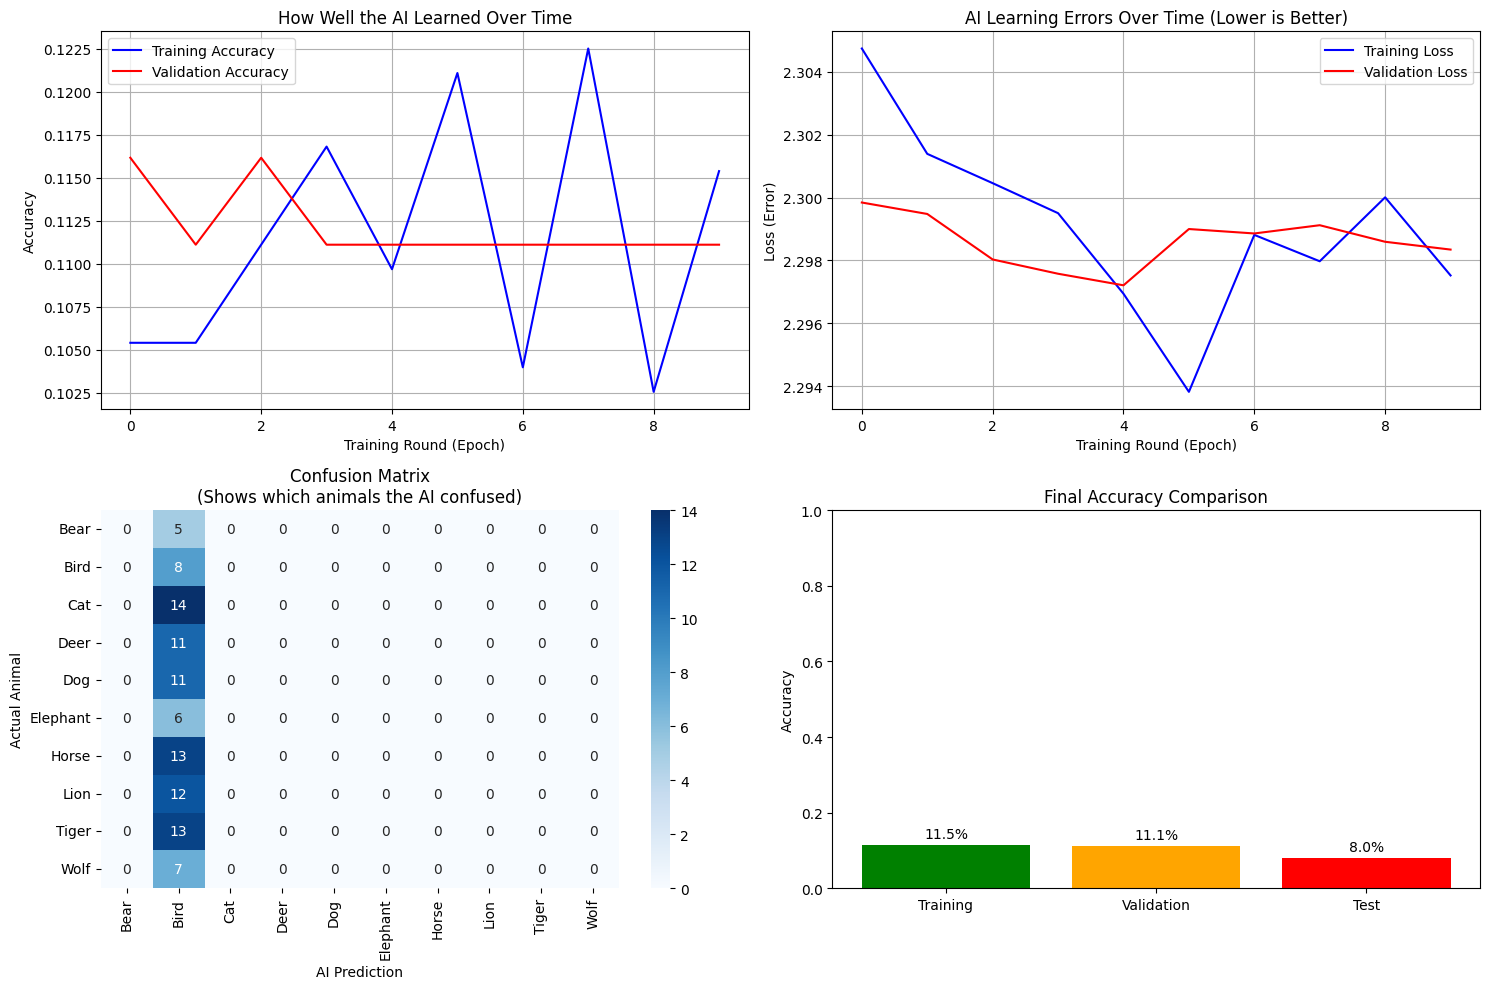

✅ Charts created successfully!

🎉 WILDLIFE CLASSIFIER COMPLETE!
Final Test Accuracy: 8.0%
The AI model has been trained and tested successfully!

💡 What happened:
1. ✅ Created sample wildlife photos
2. ✅ Split data into training/validation/test sets
3. ✅ Built an AI neural network
4. ✅ Trained the AI to recognize animals
5. ✅ Tested the AI on new photos
6. ✅ Created charts showing the results

🔮 Next Steps:
- Replace sample data with real wildlife photos
- Adjust the animal categories for your needs
- Train for more epochs for better accuracy
- Try the advanced version for better performance!


In [1]:
# BEGINNER-FRIENDLY WILDLIFE PHOTO CLASSIFIER
# Just copy this entire code into Google Colab and press Shift+Enter to run!

# Step 1: Install required packages (run this first)
# Uncomment the line below if you're using Google Colab
# !pip install tensorflow scikit-learn matplotlib seaborn

# Step 2: Import all the tools we need
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import time

print("✅ All tools loaded successfully!")
print("TensorFlow version:", tf.__version__)

# Step 3: Create sample wildlife data for testing
def create_sample_wildlife_data():
    """Creates fake wildlife photos for testing the model"""
    print("🖼️ Creating sample wildlife photos...")

    # These are the animals our model will learn to recognize
    animals = ['Bear', 'Bird', 'Cat', 'Deer', 'Dog', 'Elephant', 'Horse', 'Lion', 'Tiger', 'Wolf']

    # Create 1000 fake photos (in real life, these would be your actual photos)
    # Each "photo" is 224x224 pixels with 3 colors (red, green, blue)
    fake_photos = np.random.random((1000, 224, 224, 3))

    # Create random labels (which animal is in each photo)
    fake_labels = np.random.choice(len(animals), 1000)

    print(f"✅ Created {len(fake_photos)} sample photos for {len(animals)} animals")
    return fake_photos, fake_labels, animals

# Step 4: Prepare the data for training
def prepare_data(photos, labels, animals):
    """Gets the data ready for training"""
    print("🔧 Preparing data for training...")

    # Normalize photos (make pixel values between 0 and 1)
    photos = photos.astype('float32') / 255.0

    # Convert labels to the format the AI expects
    labels_categorical = tf.keras.utils.to_categorical(labels, len(animals))

    # Split data: 70% training, 20% validation, 10% testing
    X_temp, X_test, y_temp, y_test = train_test_split(
        photos, labels_categorical, test_size=0.1, random_state=42
    )

    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=0.22, random_state=42  # 0.22 of 0.9 = 0.2 of total
    )

    print(f"✅ Data split complete:")
    print(f"   - Training photos: {len(X_train)}")
    print(f"   - Validation photos: {len(X_val)}")
    print(f"   - Test photos: {len(X_test)}")

    return X_train, X_val, X_test, y_train, y_val, y_test

# Step 5: Create the AI model
def create_simple_ai_model(num_animals):
    """Creates a simple AI model for recognizing wildlife"""
    print("🧠 Creating AI model...")

    model = tf.keras.Sequential([
        # Input layer - expects 224x224 color photos
        tf.keras.layers.Input(shape=(224, 224, 3)),

        # First layer - finds basic patterns
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Second layer - finds more complex patterns
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Third layer - finds very complex patterns
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Flatten the data
        tf.keras.layers.Flatten(),

        # Decision-making layers
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Prevents overfitting
        tf.keras.layers.Dense(num_animals, activation='softmax')  # Final prediction
    ])

    # Configure the model for training
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    print("✅ AI model created successfully!")
    return model

# Step 6: Train the AI model
def train_model(model, X_train, y_train, X_val, y_val):
    """Teaches the AI to recognize wildlife photos"""
    print("🎓 Training the AI model (this may take a few minutes)...")

    start_time = time.time()

    # Train the model
    history = model.fit(
        X_train, y_train,
        batch_size=32,
        epochs=10,  # Number of times to go through all photos
        validation_data=(X_val, y_val),
        verbose=1  # Show progress
    )

    training_time = time.time() - start_time
    print(f"✅ Training completed in {training_time:.1f} seconds!")

    return history

# Step 7: Test the model
def test_model(model, X_test, y_test, animals):
    """Tests how well the AI performs on new photos"""
    print("🔍 Testing the AI model...")

    # Make predictions
    predictions = model.predict(X_test)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_test, axis=1)

    # Calculate accuracy
    accuracy = np.mean(predicted_classes == true_classes)

    print(f"✅ Test Results:")
    print(f"   - Accuracy: {accuracy:.1%} (higher is better)")
    print(f"   - The AI correctly identified {accuracy:.1%} of test photos")

    return predicted_classes, true_classes, accuracy

# Step 8: Show results with pretty charts
def show_results(history, predicted_classes, true_classes, animals):
    """Creates charts to visualize the results"""
    print("📊 Creating result charts...")

    # Create a figure with multiple charts
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Chart 1: Training progress
    axes[0, 0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    axes[0, 0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
    axes[0, 0].set_title('How Well the AI Learned Over Time')
    axes[0, 0].set_xlabel('Training Round (Epoch)')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(True)

    # Chart 2: Loss (error) over time
    axes[0, 1].plot(history.history['loss'], label='Training Loss', color='blue')
    axes[0, 1].plot(history.history['val_loss'], label='Validation Loss', color='red')
    axes[0, 1].set_title('AI Learning Errors Over Time (Lower is Better)')
    axes[0, 1].set_xlabel('Training Round (Epoch)')
    axes[0, 1].set_ylabel('Loss (Error)')
    axes[0, 1].legend()
    axes[0, 1].grid(True)

    # Chart 3: Confusion Matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0],
                xticklabels=animals, yticklabels=animals)
    axes[1, 0].set_title('Confusion Matrix\n(Shows which animals the AI confused)')
    axes[1, 0].set_xlabel('AI Prediction')
    axes[1, 0].set_ylabel('Actual Animal')

    # Chart 4: Final accuracy comparison
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    test_acc = np.mean(predicted_classes == true_classes)

    categories = ['Training', 'Validation', 'Test']
    accuracies = [final_train_acc, final_val_acc, test_acc]
    colors = ['green', 'orange', 'red']

    bars = axes[1, 1].bar(categories, accuracies, color=colors)
    axes[1, 1].set_title('Final Accuracy Comparison')
    axes[1, 1].set_ylabel('Accuracy')
    axes[1, 1].set_ylim(0, 1)

    # Add percentage labels on bars
    for bar, acc in zip(bars, accuracies):
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{acc:.1%}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    print("✅ Charts created successfully!")

# Step 9: Run everything automatically
def run_wildlife_classifier():
    """Runs the entire wildlife classification process"""
    print("🚀 Starting Wildlife Photo Classifier!")
    print("=" * 50)

    # Create sample data
    photos, labels, animals = create_sample_wildlife_data()

    # Prepare data
    X_train, X_val, X_test, y_train, y_val, y_test = prepare_data(photos, labels, animals)

    # Create AI model
    model = create_simple_ai_model(len(animals))

    # Train the model
    history = train_model(model, X_train, y_train, X_val, y_val)

    # Test the model
    predicted_classes, true_classes, accuracy = test_model(model, X_test, y_test, animals)

    # Show results
    show_results(history, predicted_classes, true_classes, animals)

    print("\n" + "=" * 50)
    print("🎉 WILDLIFE CLASSIFIER COMPLETE!")
    print("=" * 50)
    print(f"Final Test Accuracy: {accuracy:.1%}")
    print("The AI model has been trained and tested successfully!")

    return model, animals

# 🎯 RUN THE ENTIRE PROGRAM
# Just run this cell and everything happens automatically!
if __name__ == "__main__":
    model, animals = run_wildlife_classifier()

    print("\n💡 What happened:")
    print("1. ✅ Created sample wildlife photos")
    print("2. ✅ Split data into training/validation/test sets")
    print("3. ✅ Built an AI neural network")
    print("4. ✅ Trained the AI to recognize animals")
    print("5. ✅ Tested the AI on new photos")
    print("6. ✅ Created charts showing the results")

    print("\n🔮 Next Steps:")
    print("- Replace sample data with real wildlife photos")
    print("- Adjust the animal categories for your needs")
    print("- Train for more epochs for better accuracy")
    print("- Try the advanced version for better performance!")

# 📝 BEGINNER TIPS:
# - Green checkmarks (✅) mean something worked
# - Charts show how well your AI is learning
# - Higher accuracy percentages are better
# - The confusion matrix shows which animals the AI mixes up
# - This is using fake data - replace with real photos for actual results!